# Setup

In [1]:
from etc.init import *

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
[monochrome_palette]: value was greater than 1 and was clipped.



import copy
import os.path
import itertools
from collections import Iterable, OrderedDict, namedtuple, deque
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image
from matplotlib.gridspec import GridSpec
import pymc3 as pymc
import pandas as pd
from pandas import DataFrame
from parameters import ParameterSet

from importlib import reload

import theano_shim as shim

import mackelab as ml
import mackelab.smttk as smttk
import mackelab.iotools
import mackelab.pymc3
import mackelab.parameters
import mackelab.plot
ml.parameters.Transform.namespaces['shim'] = shim

import sinn
import sinn.histories as histories
import sinn.models
from sinn.optimize.gradient_descent import FitCollection
import sinn.analyze as anlz
from sinn.analyze.axisdata import LogLikelihood, Likelihood, Probability
from sinn.analyze.axis import Axis

import fsGIF.core as core
import fsGIF.fsgif_model as fsgif_model
from fsGIF.fsgif_model

In [2]:
import NotebookScripter
from NotebookScripter import run_notebook
NotebookScripter.set_notebook_option(with_matplotlib_backend=None)

In [3]:
savefig = True
saveext = 'pdf'

# Load data

In [4]:
data = run_notebook("Figures_load_data.ipynb")

In [5]:
plt.ioff()

# Fig 1

import matplotlib as mpl

In [6]:
fig1_nb = run_notebook("Figures_fig1.ipynb", data=data, savefig=savefig, saveext=saveext)

100%|██████████| 29/29 [00:01<00:00, 14.89it/s]


Padding around figure: savefig.pad_inches: 0.03 in


## Fig 1a

In [7]:
fig1_nb.fig1a

## Fig 1b

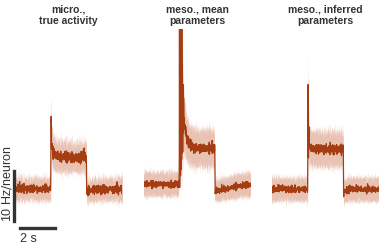

In [8]:
fig1_nb.fig1b

In [9]:
display(fig1_nb.counts)
display(pd.DataFrame([fig1_nb.simtraces.dt], index=['bin size']))

,map_adapt,map_full,true_meso,true_micro,true_all,true_ref
# distinct records,47,47,47,29,47,29
# records,47,47,47,29,47,29


,0
bin size,0.01


# Fig 2

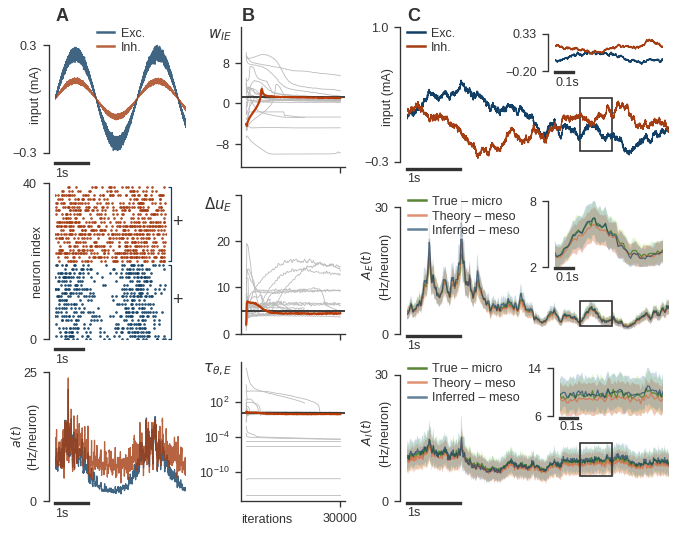

In [10]:
fig2_nb = run_notebook("Figures_fig_2pop_proof_of_concept.ipynb", data=data, savefig=savefig, saveext=saveext)
fig2_nb.fig

In [11]:
display(pd.DataFrame([[fig2_nb.truemicro_stats.N, fig2_nb.truemeso_stats.N,
                       fig2_nb.res_stats.N]],
                     columns=['True – micro', 'Theory – meso', 'Inferred – meso'],
                     index=['# sims']).T)
assert (fig2_nb.truemeso_stats.dt == fig2_nb.res_stats.dt)
display(pd.DataFrame([[fig2_nb.res_stats.dt]], index=['bin size']))

,# sims
True – micro,99
Theory – meso,100
Inferred – meso,100


,0
bin size,0.01


In [12]:
fig2_nb.measures

,$\bar{ρ}$,ρ,$\overline{RMSE}$,RMSE
mapmeso,0.918192,"[0.44262748275250197, 0.01899644022179659]",0.895269,"[3.550214376783371, 0.09236421588496552]"
true,0.949869,"[0.44351333811879157, 0.017758278424423728]",0.488930,"[3.417673669591242, 0.0744980530999218]"
truemeso,0.945691,"[0.44225209817215805, 0.01827251124547458]",0.693530,"[3.4062270632982257, 0.08166392028883526]"


In [13]:
del fig2_nb

# Fig constant input

100%|██████████| 100/100 [00:02<00:00, 44.33it/s]


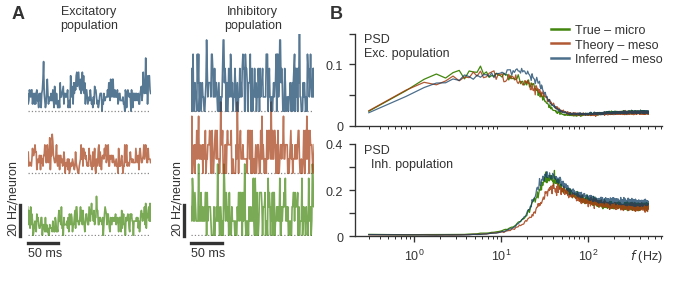

In [14]:
fig_cst_nb = run_notebook("Figures_constant_input.ipynb", data=data, savefig=savefig, saveext=saveext)
fig_cst_nb.fig

Mean firing rates

In [15]:
fig_cst_nb.firing_rates

,E,I
true_micro,9.490209,14.340490
true_meso,9.282226,13.502666
map_meso,9.815982,15.701249


In [16]:
del fig_cst_nb

# Fig 3

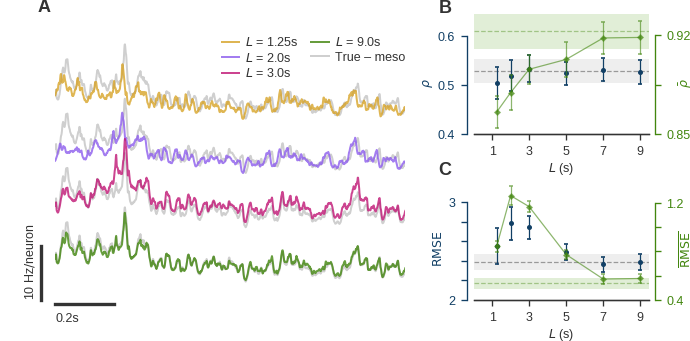

In [6]:
fig_data_reqs = run_notebook("Figures_data-requirements.ipynb", data=data, savefig=savefig, saveext=saveext)
fig_data_reqs.fig

In [7]:
fig_data_reqs.test_sims.fit_counts

,1.25,2.0,3.0,5.0,7.0,9.0
No. of fits,20,20,20,20,20,20


In [8]:
fig_data_reqs.sim_counts

,1.25,2.0,3.0,5.0,7.0,9.0,true
# sims,20,20,20,20,20,20,41


Average firing rate of E and I neurons during training

In [9]:
fig_data_reqs.firing_rate_training

array([5.85960844, 8.42789979])

Which is equivalent to the following number of spikes per second

In [10]:
fig_data_reqs.num_spikes_training[0]

3485.0

In [11]:
del fig_data_reqs

# Fig 4: Data requirements – dependence on parameters

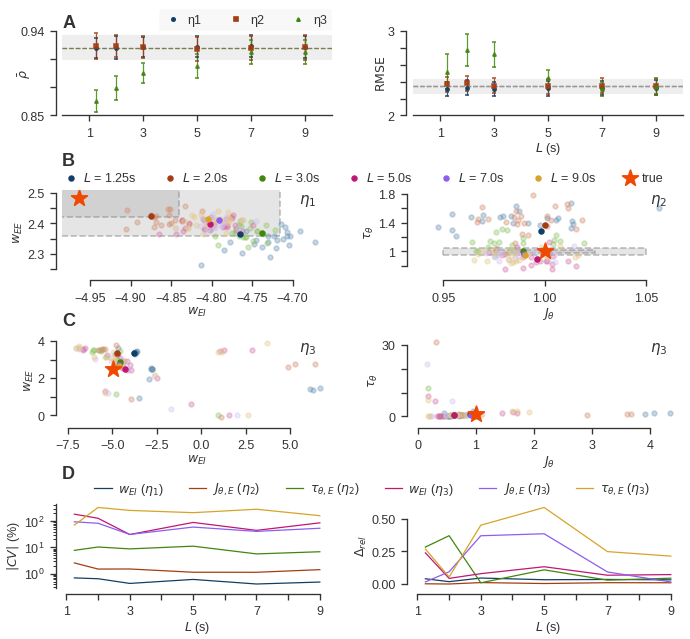

In [23]:
fig_data_reqs_dependence = run_notebook("Figures_data-requirements_dependence-parameters.ipynb",
                                        data=data, savefig=savefig, saveext=saveext)
fig_data_reqs_dependence.fig

In [24]:
print(fig_data_reqs_dependence.table_fitstats_CV_latex)

\begin{tabular}{llrrrrrr}
\hline
      & L &   1.25 &   2.00 &    3.00 &    5.00 &    7.00 &    9.00 \\
Subset & Parameter &        &        &         &         &         &         \\
\hline
$η_1$ & $w_{EE}$ &   1.33 &   0.83 &    0.96 &    0.70 &    0.61 &    0.82 \\
      & $w_{EI}$ &   0.69 &   0.64 &    0.42 &    0.60 &    0.40 &    0.48 \\
      & $w_{IE}$ &   1.38 &   1.37 &    1.53 &    1.77 &    1.90 &    1.36 \\
      & $w_{II}$ &   0.40 &   0.46 &    0.58 &    0.39 &    0.61 &    0.65 \\
$η_2$ & $J_{θ,E}$ &   2.56 &   1.49 &    1.50 &    1.13 &    1.13 &    1.42 \\
      & $τ_{θ,E}$ &   7.70 &  10.33 &    8.75 &   11.11 &    5.64 &    6.82 \\
$η_3$ & $J_{θ,E}$ &  94.03 &  82.51 &   30.99 &   59.25 &   40.58 &   53.40 \\
      & $\Delta u_E$ &  14.98 &  19.16 &    6.11 &   11.37 &    7.58 &    8.84 \\
      & $\Delta u_I$ &  32.84 &  30.33 &   13.28 &   41.22 &   21.86 &   34.30 \\
      & $c_{E}$ &  83.08 &  65.81 &   37.16 &   39.42 &   48.50 &   47.80 \\
      & $c_{I}$ &  

In [25]:
print(fig_data_reqs_dependence.table_fitstats_Drel_latex)

\begin{tabular}{llrrrrrr}
\hline
      & L &  1.25 &  2.00 &  3.00 &  5.00 &  7.00 &  9.00 \\
Subset & Parameter &       &       &       &       &       &       \\
\hline
$η_1$ & $w_{EE}$ & 0.047 & 0.023 & 0.045 & 0.034 & 0.029 & 0.027 \\
      & $w_{EI}$ & 0.040 & 0.018 & 0.046 & 0.033 & 0.035 & 0.032 \\
      & $w_{IE}$ & 0.013 & 0.038 & 0.000 & 0.001 & 0.005 & 0.024 \\
      & $w_{II}$ & 0.018 & 0.005 & 0.022 & 0.018 & 0.012 & 0.005 \\
$η_2$ & $J_{θ,E}$ & 0.002 & 0.000 & 0.011 & 0.004 & 0.010 & 0.009 \\
      & $τ_{θ,E}$ & 0.283 & 0.370 & 0.009 & 0.108 & 0.030 & 0.045 \\
$η_3$ & $J_{θ,E}$ & 0.016 & 0.094 & 0.369 & 0.385 & 0.092 & 0.016 \\
      & $\Delta u_E$ & 0.215 & 0.182 & 0.090 & 0.086 & 0.092 & 0.052 \\
      & $\Delta u_I$ & 0.520 & 0.338 & 0.466 & 0.302 & 0.129 & 0.058 \\
      & $c_{E}$ & 0.420 & 0.376 & 0.469 & 0.382 & 0.239 & 0.160 \\
      & $c_{I}$ & 2.825 & 0.006 & 0.133 & 0.142 & 0.128 & 0.161 \\
      & $w_{EE}$ & 0.345 & 0.348 & 0.151 & 0.001 & 0.084 & 0.067 \\
    

In [26]:
del fig_data_reqs_dependence

# Fig 5: Heterogeneous model

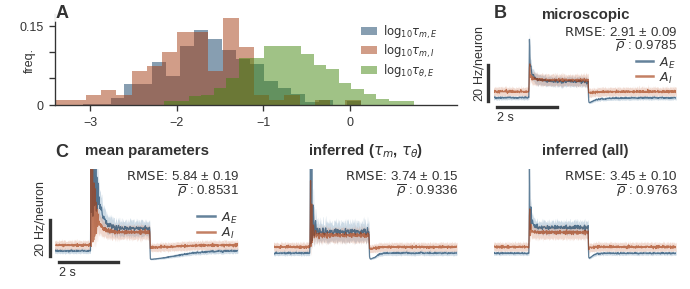

In [27]:
try:
    fig_hetero = fig1_nb.fig_hetero_nb
except NameError:
    fig_hetero = run_notebook("Figures_hetero-model.ipynb", data=data, savefig=savefig, saveext=saveext)
fig_hetero.fig

In [28]:
display(fig_hetero.counts)
display(pd.DataFrame([fig_hetero.simtraces.dt], index=['bin size']))

,map_adapt,map_full,true_meso,true_micro,true_all,true_ref
# distinct records,47,47,47,29,47,29
# records,47,47,47,29,47,29


,0
bin size,0.01


In [29]:
#fig_hetero.dataframe_result

In [30]:
#fig_hetero.dataframe_hetero_params

In [31]:
#fig_hetero.table_hetero_params_latex

In [32]:
del fig_hetero

# Fig. 6 & Supplementary – MCMC posteriors

In [33]:
_savefig = savefig
savefig = False # These plots require a bit of post-processing, so don't risk overwriting them

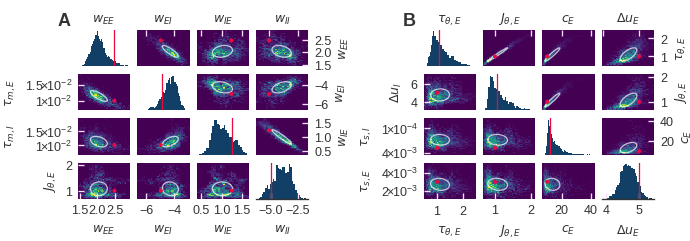

In [34]:
figs_mcmc = run_notebook("Figures_mcmc.ipynb", data=data, savefig=savefig, saveext=saveext)
figs_mcmc.fig

Supplementary figure

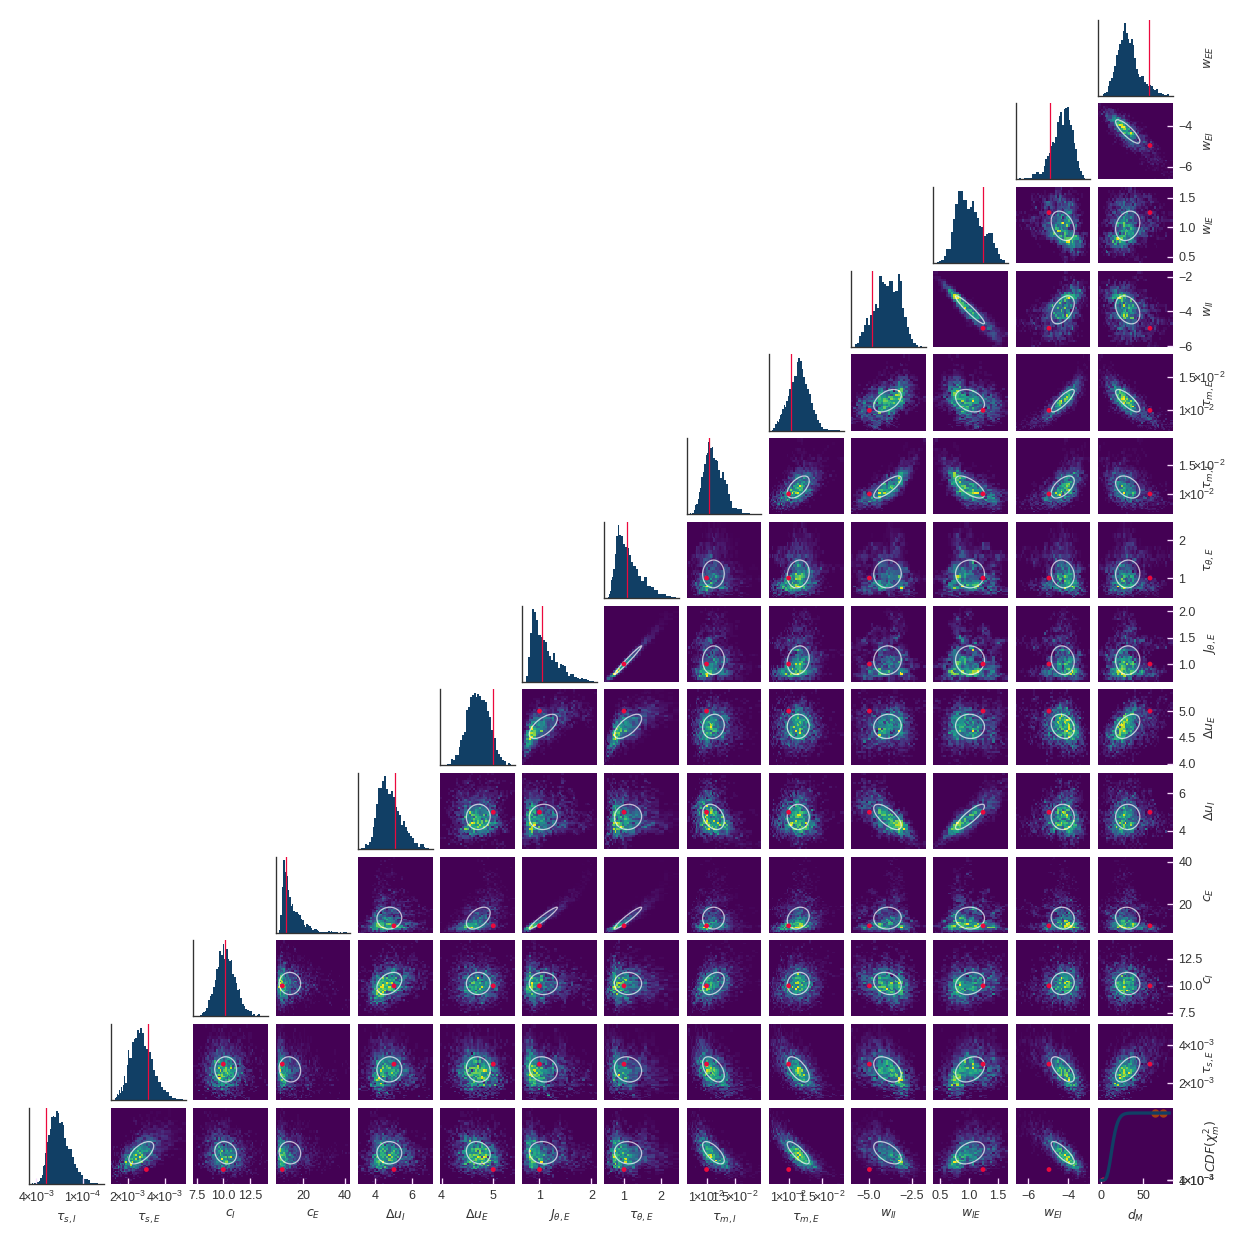

In [35]:
figs_mcmc.suppfig

In [36]:
del figs_mcmc

In [37]:
savefig = _savefig

# Fig 7, 8 – 4 population inference

In [38]:
figs_4pop = run_notebook("Figures_4pop.ipynb", savefig=savefig, saveext=saveext)

100%|██████████| 61/61 [00:06<00:00,  9.08it/s]


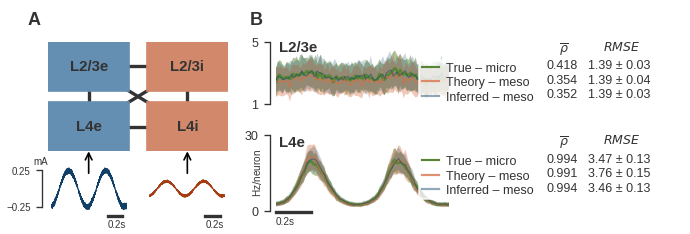

In [39]:
figs_4pop.figtrain

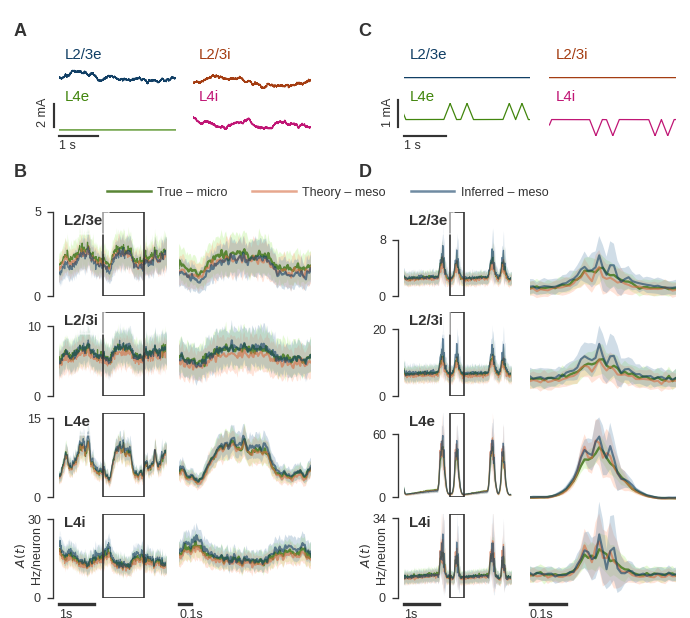

In [40]:
figs_4pop.figtest

In [41]:
print("train sims")
print('ref', figs_4pop.trainsims.ref_sims.N)
for model, sims in figs_4pop.trainsims.test_sims.items():
    print(model, sims.traces.N)
print()
print("OU sims")
print('ref', figs_4pop.OUsims.ref_sims.N)
for model, sims in figs_4pop.OUsims.test_sims.items():
    print(model, sims.traces.N)
print()
print("ramp sims")
print('ref', figs_4pop.rampsims.ref_sims.N)
for model, sims in figs_4pop.rampsims.test_sims.items():
    print(model, sims.traces.N)

train sims
ref 31
true 30
true_all 61
mesogt 61
map 61

OU sims
ref 31
true 30
true_all 61
mesogt 61
map 61

ramp sims
ref 31
true 30
true_all 61
mesogt 61
map 61


In [42]:
print(figs_4pop.table_input_params_training)

\begin{tabular}{lrrrr}
\toprule
{} &  L2/3e &  L2/3i &   L4e &  L4i \\
\midrule
\$B\$ &    0.0 &    0.0 &  0.25 &  0.1 \\
\$ω\$ &    2.0 &    2.0 &  2.00 &  2.0 \\
\$q\$ &    4.0 &    4.0 &  4.00 &  4.0 \\
\bottomrule
\end{tabular}



In [43]:
print(figs_4pop.table_mixed_performance_1)

\begin{tabular}{llSSSSSSSS}
\toprule
        &                  & \multicolumn{4}{l}{$\RMSE$} \\
        &                  &        {L2/3e} &        {L2/3i} &          {L4e} &          {L4i} \\
Input & Model &                &                &                &                \\
\midrule
Sine & \cc{True} -- micro &  1.39 \pm 0.03 &  3.46 \pm 0.10 &  3.47 \pm 0.13 &  4.59 \pm 0.13 \\
        & \cc{Theory} -- meso &  1.39 \pm 0.04 &  3.37 \pm 0.10 &  3.76 \pm 0.15 &  4.51 \pm 0.13 \\
        & \cc{MAP} -- meso &  1.39 \pm 0.03 &  3.49 \pm 0.09 &  3.46 \pm 0.13 &  4.53 \pm 0.13 \\
OU & \cc{True} -- micro &  1.22 \pm 0.03 &  3.14 \pm 0.08 &  2.26 \pm 0.07 &  5.13 \pm 0.15 \\
        & \cc{Theory} -- meso &  1.21 \pm 0.03 &  3.06 \pm 0.09 &  2.26 \pm 0.07 &  4.95 \pm 0.15 \\
        & \cc{MAP} -- meso &  1.22 \pm 0.03 &  3.11 \pm 0.08 &  2.25 \pm 0.06 &  5.30 \pm 0.14 \\
Impulse & \cc{True} -- micro &  1.54 \pm 0.05 &  3.64 \pm 0.11 &  5.32 \pm 0.46 &  5.11 \pm 0.23 \\
        & \cc{Theory}

In [44]:
print(figs_4pop.table_mixed_performance_2)

\begin{tabular}{llSSSSSSSS}
\toprule
        &                  & \multicolumn{4}{l}{$\bar{ρ}$} \\
        &                  &   {L2/3e} & {L2/3i} & {L4e} & {L4i} \\
Input & Model &           &         &       &       \\
\midrule
Sine & \cc{True} -- micro &     0.418 &   0.386 & 0.994 & 0.948 \\
        & \cc{Theory} -- meso &     0.354 &   0.348 & 0.991 & 0.945 \\
        & \cc{MAP} -- meso &     0.352 &   0.455 & 0.994 & 0.951 \\
OU & \cc{True} -- micro &     0.829 &   0.694 & 0.977 & 0.905 \\
        & \cc{Theory} -- meso &     0.815 &   0.717 & 0.978 & 0.914 \\
        & \cc{MAP} -- meso &     0.855 &   0.756 & 0.977 & 0.916 \\
Impulse & \cc{True} -- micro &     0.914 &   0.879 & 0.996 & 0.927 \\
        & \cc{Theory} -- meso &     0.880 &   0.858 & 0.979 & 0.870 \\
        & \cc{MAP} -- meso &     0.912 &   0.896 & 0.988 & 0.887 \\
\bottomrule
\end{tabular}



In [45]:
print(figs_4pop.table_inferred_params)  # Should be moved to fit traces notebook

  \begin{tabular}{lrrrr|rrrr}
          & \multicolumn{ 4 }{c}{MAP} & \multicolumn{ 4 }{c}{Theory}\\ \cline{2-5} \cline{6-9}
          & $L2/3e$ & $L2/3i$ & $L4e$ & $L4i$ & $L2/3e$ & $L2/3i$ & $L4e$ & $L4i$ \\ \hline
    $w_{ L2/3e\leftarrow \cdot}$ & 0.734 & -5.629 & 1.546 & -5.292 & 1.245 & -4.964 & 1.245 & -4.964 \\
    $w_{ L2/3i\leftarrow \cdot}$ & 1.181 & -5.406 & 1.419 & -4.294 & 1.245 & -4.964 & 1.245 & -4.964 \\
    $w_{ L4e\leftarrow \cdot}$ & 1.528 & -0.637 & 2.058 & -4.213 & 1.245 & -4.964 & 2.482 & -4.964 \\
    $w_{ L4i\leftarrow \cdot}$ & 0.174 & 1.112 & 1.046 & -3.994 & 1.245 & -4.964 & 1.245 & -4.964 \\
    $τ_m$ & 0.016 & 0.015 & 0.008 & 0.009 & 0.010 & 0.010 & 0.010 & 0.010 \\
    $c$ & 16.717 & 18.170 & 9.020 & 9.680 & 10.000 & 10.000 & 10.000 & 10.000 \\
    $Δu$ & 7.435 & 6.453 & 4.750 & 4.420 & 5.000 & 5.000 & 5.000 & 5.000 \\
    $τ_s$ & 0.001 & 0.006 & 0.002 & 0.009 & 0.003 & 0.006 & 0.003 & 0.006 \\
    $J_θ$ & 0.232 &  —  & 0.967 &  —  & 1.000 &  —  & 1.000 &

In [46]:
del figs_4pop

# Supplementary - Fit traces

This notebooks are commented out because the traces for the 4 population model consume ~6GB of RAM when loaded, which can freeze a normal computer

    figs_fits = run_notebook("Figures_fit-traces.ipynb", data=data, savefig=savefig)

    fig_2pop

    fig_4pop